In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from lesson_functions import *
from scipy.ndimage.measurements import label
%matplotlib inline

In [2]:
### DONE: Tweak these parameters and see how the results change.
colorspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
spatial = 16
histbin = 32
orient = 9
pix_per_cell = 16
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
y_start_stop = [350, None] # Min and max in y to search in slide_window()

In [3]:
import pickle
with open("model.pickle", "rb") as f:
    (svc,X_scaler) = pickle.load(f) 

In [17]:

def find_vehicles_in_image(image, no_vis=True):
    
    bboxes = []
    #Medium Cars
    out_img1, bboxes = find_cars(image, 410, 530, 1.5, svc, X_scaler, orient, pix_per_cell, cell_per_block, (spatial, spatial),
                    histbin, bboxes=bboxes, cells_per_step = 1)
    #Small Cars
    out_img2, bboxes = find_cars(image, 390, 440, 0.25, svc, X_scaler, orient, pix_per_cell, cell_per_block, (spatial, spatial),
                    histbin, bboxes=bboxes, cells_per_step = 2)
    
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    # Add heat to each box in box list
    heat = add_heat(heat,bboxes)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,2)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img, bboxes = draw_labeled_bboxes(np.copy(image), labels)    

    if no_vis is False:
        fig = plt.figure()
        plt.subplot(121)
        plt.imshow(draw_img)
        plt.title('Car Positions')
        plt.subplot(122)
        plt.imshow(heatmap, cmap='hot')
        plt.title('Heat Map')
        #fig.tight_layout()

    #return draw_boxes(image, bboxes)
    #return out_img
    return draw_img

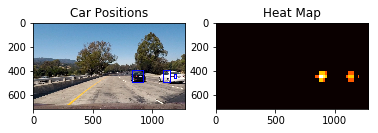

In [18]:
image = mpimg.imread('test_images\\test1.jpg')
out = find_vehicles_in_image(image, no_vis=False)
#plt.imshow(out)


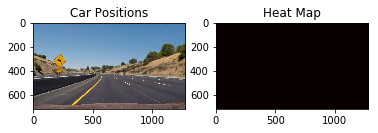

In [39]:
image = mpimg.imread('test_images\\test2.jpg')
out = find_vehicles_in_image(image, no_vis=False)
#plt.imshow(out)

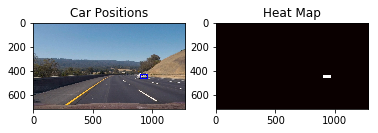

In [40]:
image = mpimg.imread('test_images\\test3.jpg')
out = find_vehicles_in_image(image, no_vis=False)
#plt.imshow(out)

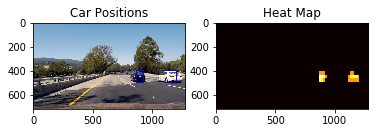

In [41]:
image = mpimg.imread('test_images\\test4.jpg')
out = find_vehicles_in_image(image, no_vis=False)
#plt.imshow(out)

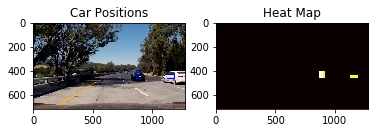

In [42]:
image = mpimg.imread('test_images\\test5.jpg')
out = find_vehicles_in_image(image, no_vis=False)
#plt.imshow(out)

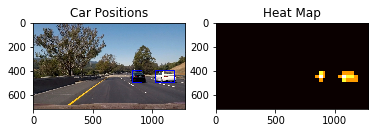

In [43]:
image = mpimg.imread('test_images\\test6.jpg')
out = find_vehicles_in_image(image, no_vis=False)
#plt.imshow(out)